In [1]:
import pandas as pd
import numpy as np
import csv as csv
import math
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cross_validation import train_test_split
import time
import time
from datetime import date
import datetime

%matplotlib inline

#### Concatenate the two training DataFrames

In [2]:
train_df1 = pd.read_csv('../hackerrank-predict-email-opens-dataset/training_dataset.csv/training_dataset.csv', header=0)  
train_df2 = pd.read_csv('../hackerrank-predict-email-opens-dataset/training_dataset.csv/training_dataset_complement.csv', header=0)  
train_df = pd.concat([train_df1,train_df2])
train_df.shape

(486048, 54)

#### Dropping few columns

In [3]:
train_df = train_df.drop(['user_id','mail_id','mail_type','clicked','hacker_timezone',
                          'mail_category','sent_time','unsubscribed',
                          'open_time','click_time','unsubscribe_time','hacker_created_at'], axis=1) 
train_df.head()

,last_online,contest_login_count,contest_login_count_1_days,contest_login_count_30_days,contest_login_count_365_days,contest_login_count_7_days,contest_participation_count,contest_participation_count_1_days,contest_participation_count_30_days,contest_participation_count_365_days,...,submissions_count_contest,submissions_count_contest_1_days,submissions_count_contest_30_days,submissions_count_contest_365_days,submissions_count_contest_7_days,submissions_count_master,submissions_count_master_1_days,submissions_count_master_30_days,submissions_count_master_365_days,submissions_count_master_7_days
0,1.459520e+09,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,13,0,0,13,0
1,1.461210e+09,3,0,1,3,0,3,0,1,3,...,16,0,3,16,0,83,0,43,83,4
2,1.463411e+09,3,0,0,3,0,3,0,0,3,...,0,0,0,0,0,16,0,3,16,0
3,1.462768e+09,3,0,0,3,0,3,0,0,3,...,16,0,0,16,0,85,0,9,85,0
4,1.461248e+09,5,0,0,5,0,13,0,0,13,...,17,0,1,17,0,43,0,0,43,0


#### Converting Boolean to Int

In [4]:
train_df['opened'] = train_df.opened.map({True:1,False:0}).astype(int)
train_df['hacker_confirmation'] = train_df.hacker_confirmation.map({True:1,False:0}).astype(int)
train_df.shape


(486048, 42)

#### Dropping rows with NA or Null Values (last_online is the only attribute with NA or Null values)

In [5]:
train_df = train_df.dropna(subset=['last_online'],axis=0)
train_df.shape

(485471, 42)

#### Sorting Columns to data constancy

In [6]:
train_df = train_df.reindex_axis(sorted(train_df.columns), axis=1)
train_df.shape

(485471, 42)

#### Adding opened attribute to the first column of DataFrame

In [7]:
train_df = train_df.reindex_axis(['opened'] + list([col for col in train_df.columns if col != 'opened']), axis=1)
train_df.head()

,opened,contest_login_count,contest_login_count_1_days,contest_login_count_30_days,contest_login_count_365_days,contest_login_count_7_days,contest_participation_count,contest_participation_count_1_days,contest_participation_count_30_days,contest_participation_count_365_days,...,submissions_count_contest,submissions_count_contest_1_days,submissions_count_contest_30_days,submissions_count_contest_365_days,submissions_count_contest_7_days,submissions_count_master,submissions_count_master_1_days,submissions_count_master_30_days,submissions_count_master_365_days,submissions_count_master_7_days
0,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,13,0,0,13,0
1,0,3,0,1,3,0,3,0,1,3,...,16,0,3,16,0,83,0,43,83,4
2,0,3,0,0,3,0,3,0,0,3,...,0,0,0,0,0,16,0,3,16,0
3,0,3,0,0,3,0,3,0,0,3,...,16,0,0,16,0,85,0,9,85,0
4,0,5,0,0,5,0,13,0,0,13,...,17,0,1,17,0,43,0,0,43,0


#### Check for NA values

In [8]:
hasany = False
for cl in train_df.columns.values:
    hasNa = train_df[cl].isnull().sum() > 0
    if hasNa:
        hasany = True
        print cl,train_df[cl].isnull().sum()
if not hasany:
    print 'No NA found'
    

No NA found


#### Check data types for your model

In [9]:
for cl in train_df.columns.values:
    print cl,train_df[cl].dtype

opened int32
contest_login_count int64
contest_login_count_1_days int64
contest_login_count_30_days int64
contest_login_count_365_days int64
contest_login_count_7_days int64
contest_participation_count int64
contest_participation_count_1_days int64
contest_participation_count_30_days int64
contest_participation_count_365_days int64
contest_participation_count_7_days int64
forum_comments_count int64
forum_count int64
forum_expert_count int64
forum_questions_count int64
hacker_confirmation int32
ipn_count int64
ipn_count_1_days int64
ipn_count_30_days int64
ipn_count_365_days int64
ipn_count_7_days int64
ipn_read int64
ipn_read_1_days int64
ipn_read_30_days int64
ipn_read_365_days int64
ipn_read_7_days int64
last_online float64
submissions_count int64
submissions_count_1_days int64
submissions_count_30_days int64
submissions_count_365_days int64
submissions_count_7_days int64
submissions_count_contest int64
submissions_count_contest_1_days int64
submissions_count_contest_30_days int64
su

In [12]:
from sklearn import linear_model
from sklearn import tree
from sklearn import svm
from sklearn import ensemble 
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import auc,roc_curve

train_data = train_df.values
x_train, x_test, y_train, y_test = train_test_split(train_data[0::,1::], train_data[0::,0], 
                            test_size = 0.2, random_state = 123) # Split training/test.

# hipotese = linear_model.LogisticRegression(C=1e5)
hipotese = tree.DecisionTreeClassifier(random_state=1234)
# hipotese = ensemble.RandomForestClassifier(random_state=1234)

# hipotese = svm.SVC()

hipotese.fit(x_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1234, splitter='best')

In [13]:
y_true, y_pred = y_test, hipotese.predict(x_test) # Get our predictions
print(classification_report(y_true, y_pred)) # Classification on each digit


             precision    recall  f1-score   support

        0.0       0.79      0.83      0.81     64915
        1.0       0.62      0.55      0.58     32180

avg / total       0.73      0.74      0.73     97095



ROC Curve
--------

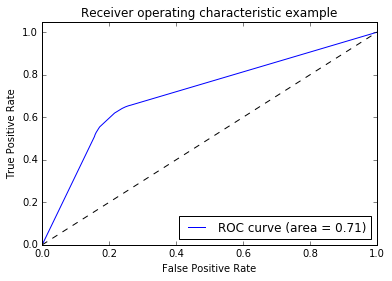

In [25]:
y_true, y_pred_prob = y_test, hipotese.predict_proba(x_test) # Get our predictions

# Compute ROC curve and ROC area for prediction of second predictions (true class)
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob[::,1])
roc_auc = auc(fpr, tpr)


##############################################################################
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Best Cutoff
-------

### The optimal cut off would be where tpr is high and fpr is low
### tpr - (1-fpr) is zero or near to zero is the optimal cut off point


       1-fpr       fpr        tf  thresholds      tpr
52  0.737303  0.262697 -0.081243    0.066667  0.65606


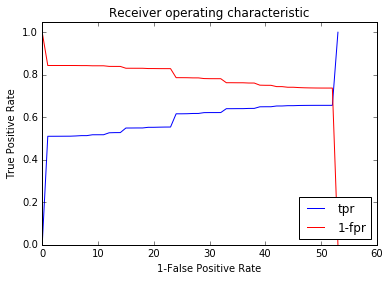

In [33]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})

print roc.ix[(roc.tf-0).abs().argsort()[:1]]

# Plot tpr vs 1-fpr
plt.figure()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.ylim([0.0, 1.05])
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


### Get the Best Cutoff method - Credits: Manohar Swamynathan
### http://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python


In [28]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 


### Using the method to the probabilistic prediction of the true class from the model

In [29]:
threshold = Find_Optimal_Cutoff(y_true, y_pred_prob[::,1])
print threshold

[0.066666666666666666]


### Find prediction to the dataframe applying threshold


In [36]:
y_true,y_pred = y_test,map(lambda x: 1 if x > threshold else 0,y_pred_prob[::,1])
print(classification_report(y_true, y_pred)) # Classification on each digit


             precision    recall  f1-score   support

        0.0       0.81      0.74      0.77     64915
        1.0       0.55      0.66      0.60     32180

avg / total       0.73      0.71      0.72     97095

